## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as offline


## Questions to analyze
- Popularity of Musicians and Music, Most Listened to artiste
- Loudest Music
- Loudest Musicians
- Correlation amongst the columns
- Acousticness vs Energy, approximately a strong positive correlation
- Acousticness vs Loudness; Instrumentalness vs Loudness; moderate negative correlation
- Valence vs Danceabilty; Valence vs Energy; moderate positive correlations
- Most Used Key
- Longest songs
- Relative frequency of Time Signature
- Tempo of Songs


In [2]:
data = pd.read_csv("1990sClassicHits.csv")
data.head()

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,1,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,1,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,0,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,0,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990


In [3]:
# Checking through the data
data.sample(10)
data.shape
data.info

# checking for null values
null_values = data.isnull().sum().sum()
print('There are', null_values, 'null values')

# Described data 
data.describe()

There are 0 null values


,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,3.947769,0.622967,0.623548,5.412405,-8.349071,0.655060,0.075793,0.230068,0.052947,0.171865,0.531424,118.711789,57.722524,1994.405876
std,0.286769,0.154782,0.203975,3.514783,3.892821,0.475608,0.079570,0.256284,0.180214,0.138296,0.246091,29.684070,17.599522,2.926405
min,1.000000,0.135000,0.001340,0.000000,-42.950000,0.000000,0.023000,0.000004,0.000000,0.025000,0.006720,48.718000,0.000000,1990.000000
25%,4.000000,0.518500,0.479500,2.000000,-10.166500,0.000000,0.032400,0.029700,0.000000,0.089200,0.341500,96.924000,49.000000,1992.000000
50%,4.000000,0.631000,0.639000,6.000000,-7.599000,1.000000,0.042900,0.120000,0.000006,0.118000,0.535000,115.010000,60.000000,1994.000000
75%,4.000000,0.738000,0.780000,9.000000,-5.751000,1.000000,0.075600,0.344500,0.000741,0.217500,0.728500,133.424000,70.000000,1997.000000
max,5.000000,0.979000,0.999000,11.000000,0.919000,1.000000,0.529000,0.995000,0.987000,0.965000,0.975000,219.973000,92.000000,1999.000000


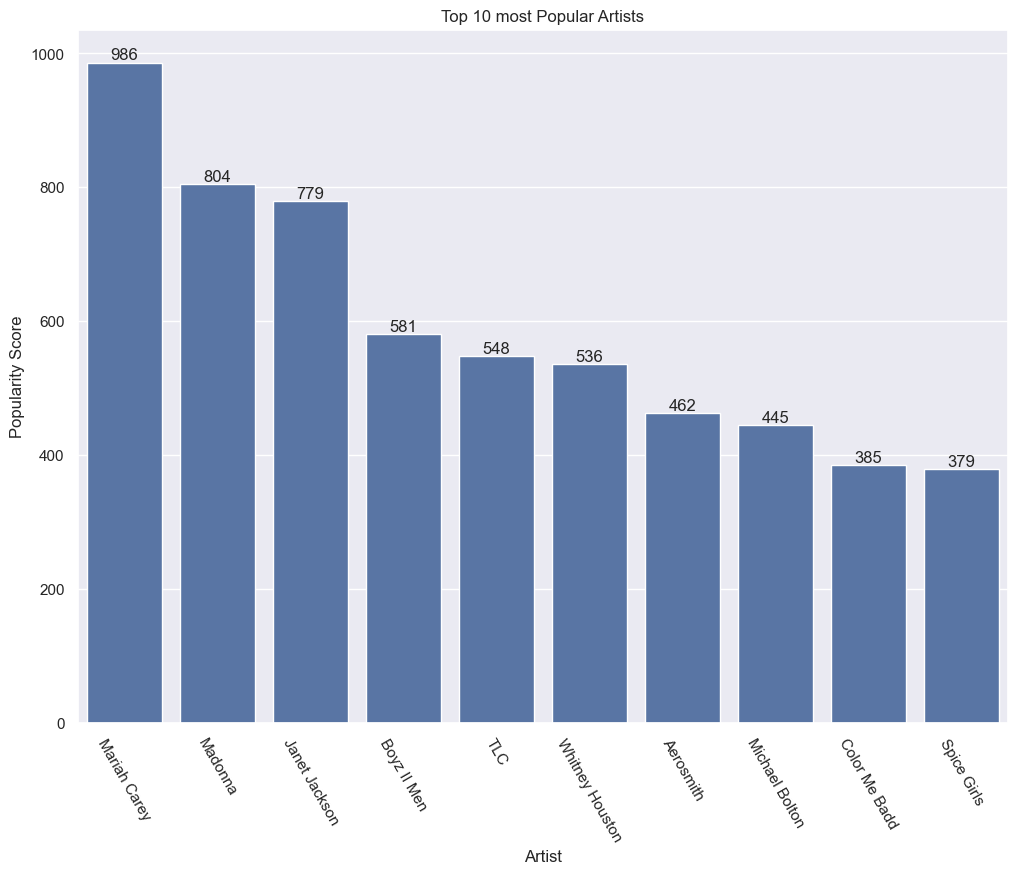

In [4]:
# Popularity of Artists based on popularity
most_pop_artiste = data.groupby('Artist')[['Popularity']].sum()
most_pop_artiste.sort_values(by='Popularity', ascending=False)
top_10 = most_pop_artiste.sort_values(by='Popularity', ascending=False)[0 : 10]
sns.set(rc={'figure.figsize': (12, 9)})
fig = sns.barplot(top_10, x='Artist', y="Popularity")
for i in fig.containers:
    fig.bar_label(i, label_type='edge')
plt.xticks(rotation=-60, ha='center')
plt.ylabel("Popularity Score")
plt.title("Top 10 most Popular Artists");
# plt.savefig("poparts.png")


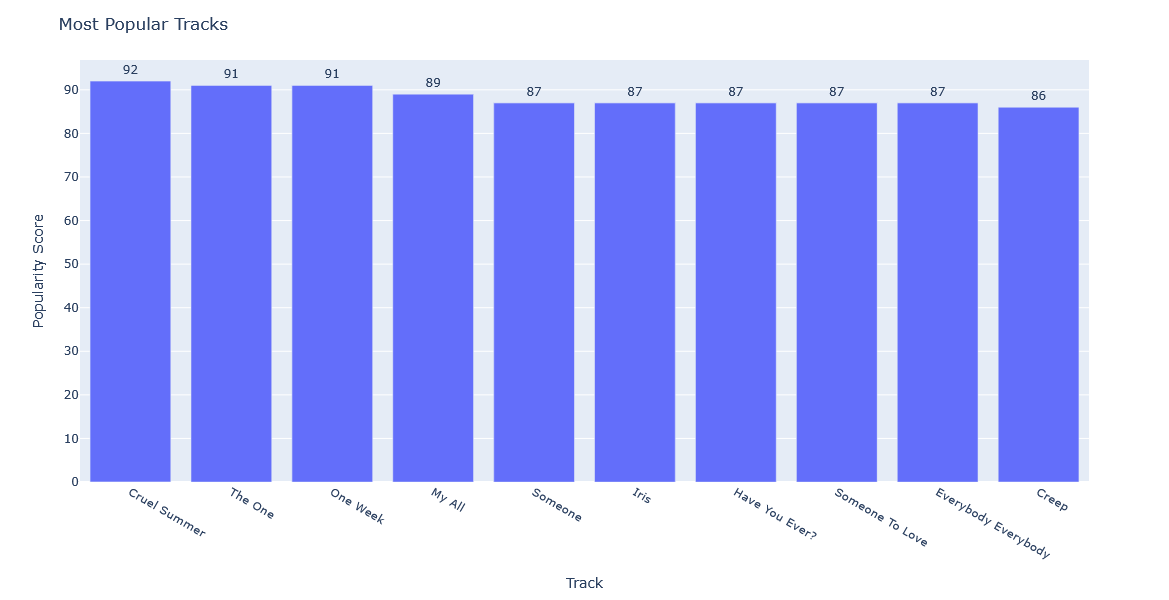

In [5]:
# top 10 most popular track
top_10_tracks = data[["Artist","Track", "Popularity"]].sort_values(by="Popularity", ascending=False)[0:10]
fig = px.bar(top_10_tracks, y="Popularity", x="Track", text="Popularity", hover_data="Artist")
fig.update_layout(
    title="Most Popular Tracks",
    yaxis_title="Popularity Score",
    yaxis = dict(
        tickmode = "array",
        tickvals = [i for i in range(0, 93, 10)]
    ),
    height = 600
)

fig.update_traces(textposition='outside')
fig.show();
# plt.savefig("poptracks.png")

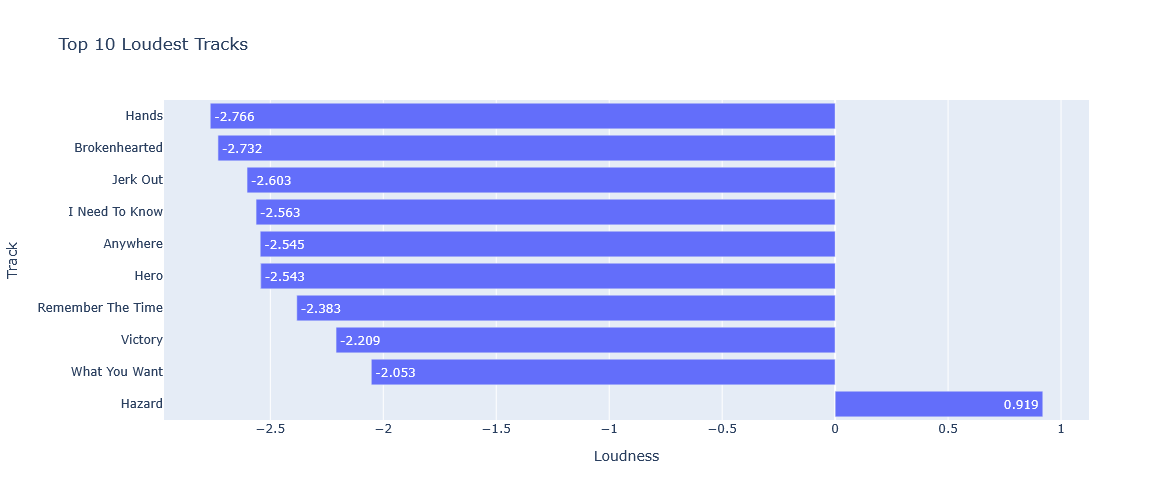

In [6]:
# Loudest Tracks
df_loudest = data.sort_values(by="Loudness", ascending=False).head(10)
fig = px.bar(
    df_loudest, y="Track", x="Loudness", orientation="h", 
    hover_data="Artist", text="Loudness", 
    title="Top 10 Loudest Tracks"
)
fig.update_layout(
    height=500
)
fig.show()

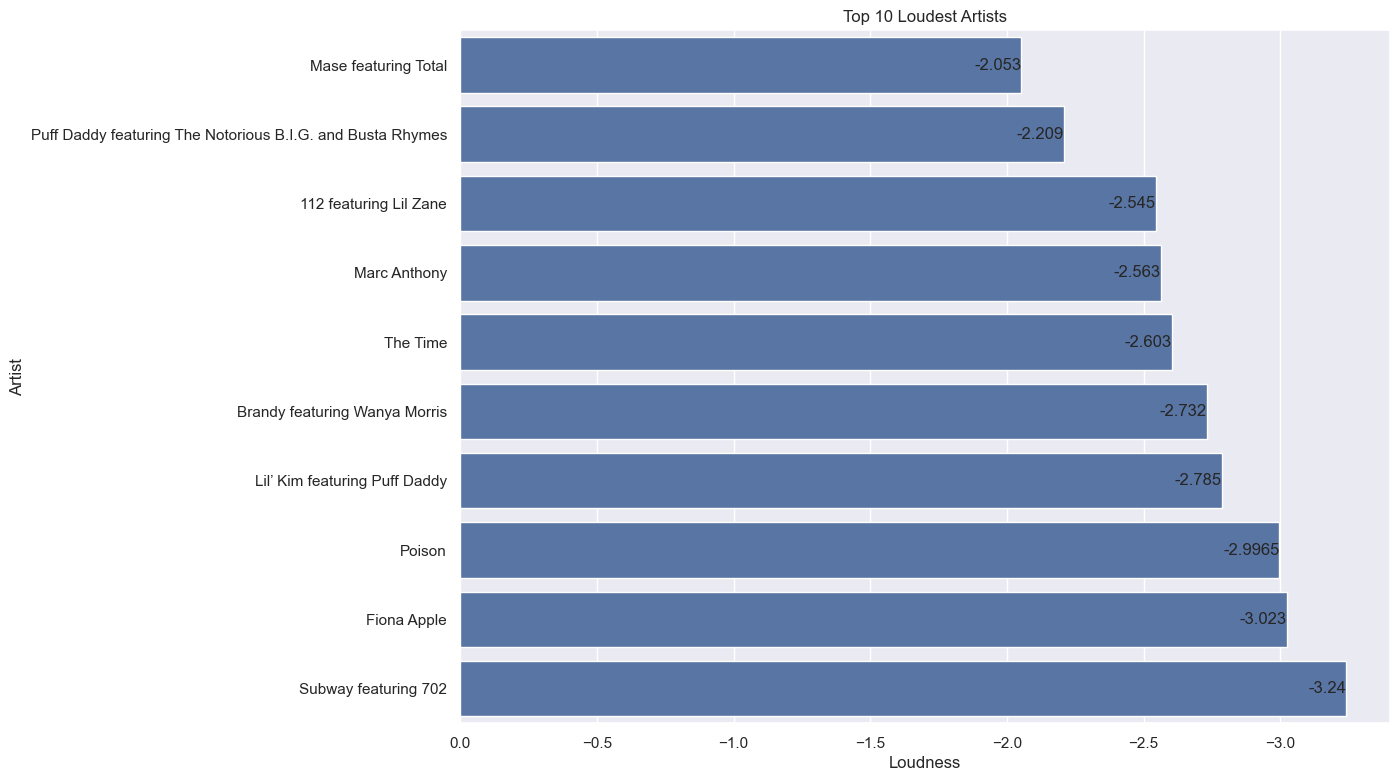

In [7]:
# Loudest Musicians
loudest_artists = data.groupby('Artist')[['Loudness']].mean().sort_values(by="Loudness", ascending=False)[0:10]
sns.set(rc={'figure.figsize': (12, 9)})
fig = sns.barplot(loudest_artists, y='Artist', x="Loudness", orient="h")
for i in fig.containers:
    fig.bar_label(i, label_type='edge')
fig.axes.invert_xaxis()    
plt.ylabel("Artist")
plt.title("Top 10 Loudest Artists");
# plt.savefig("loudarts.png");

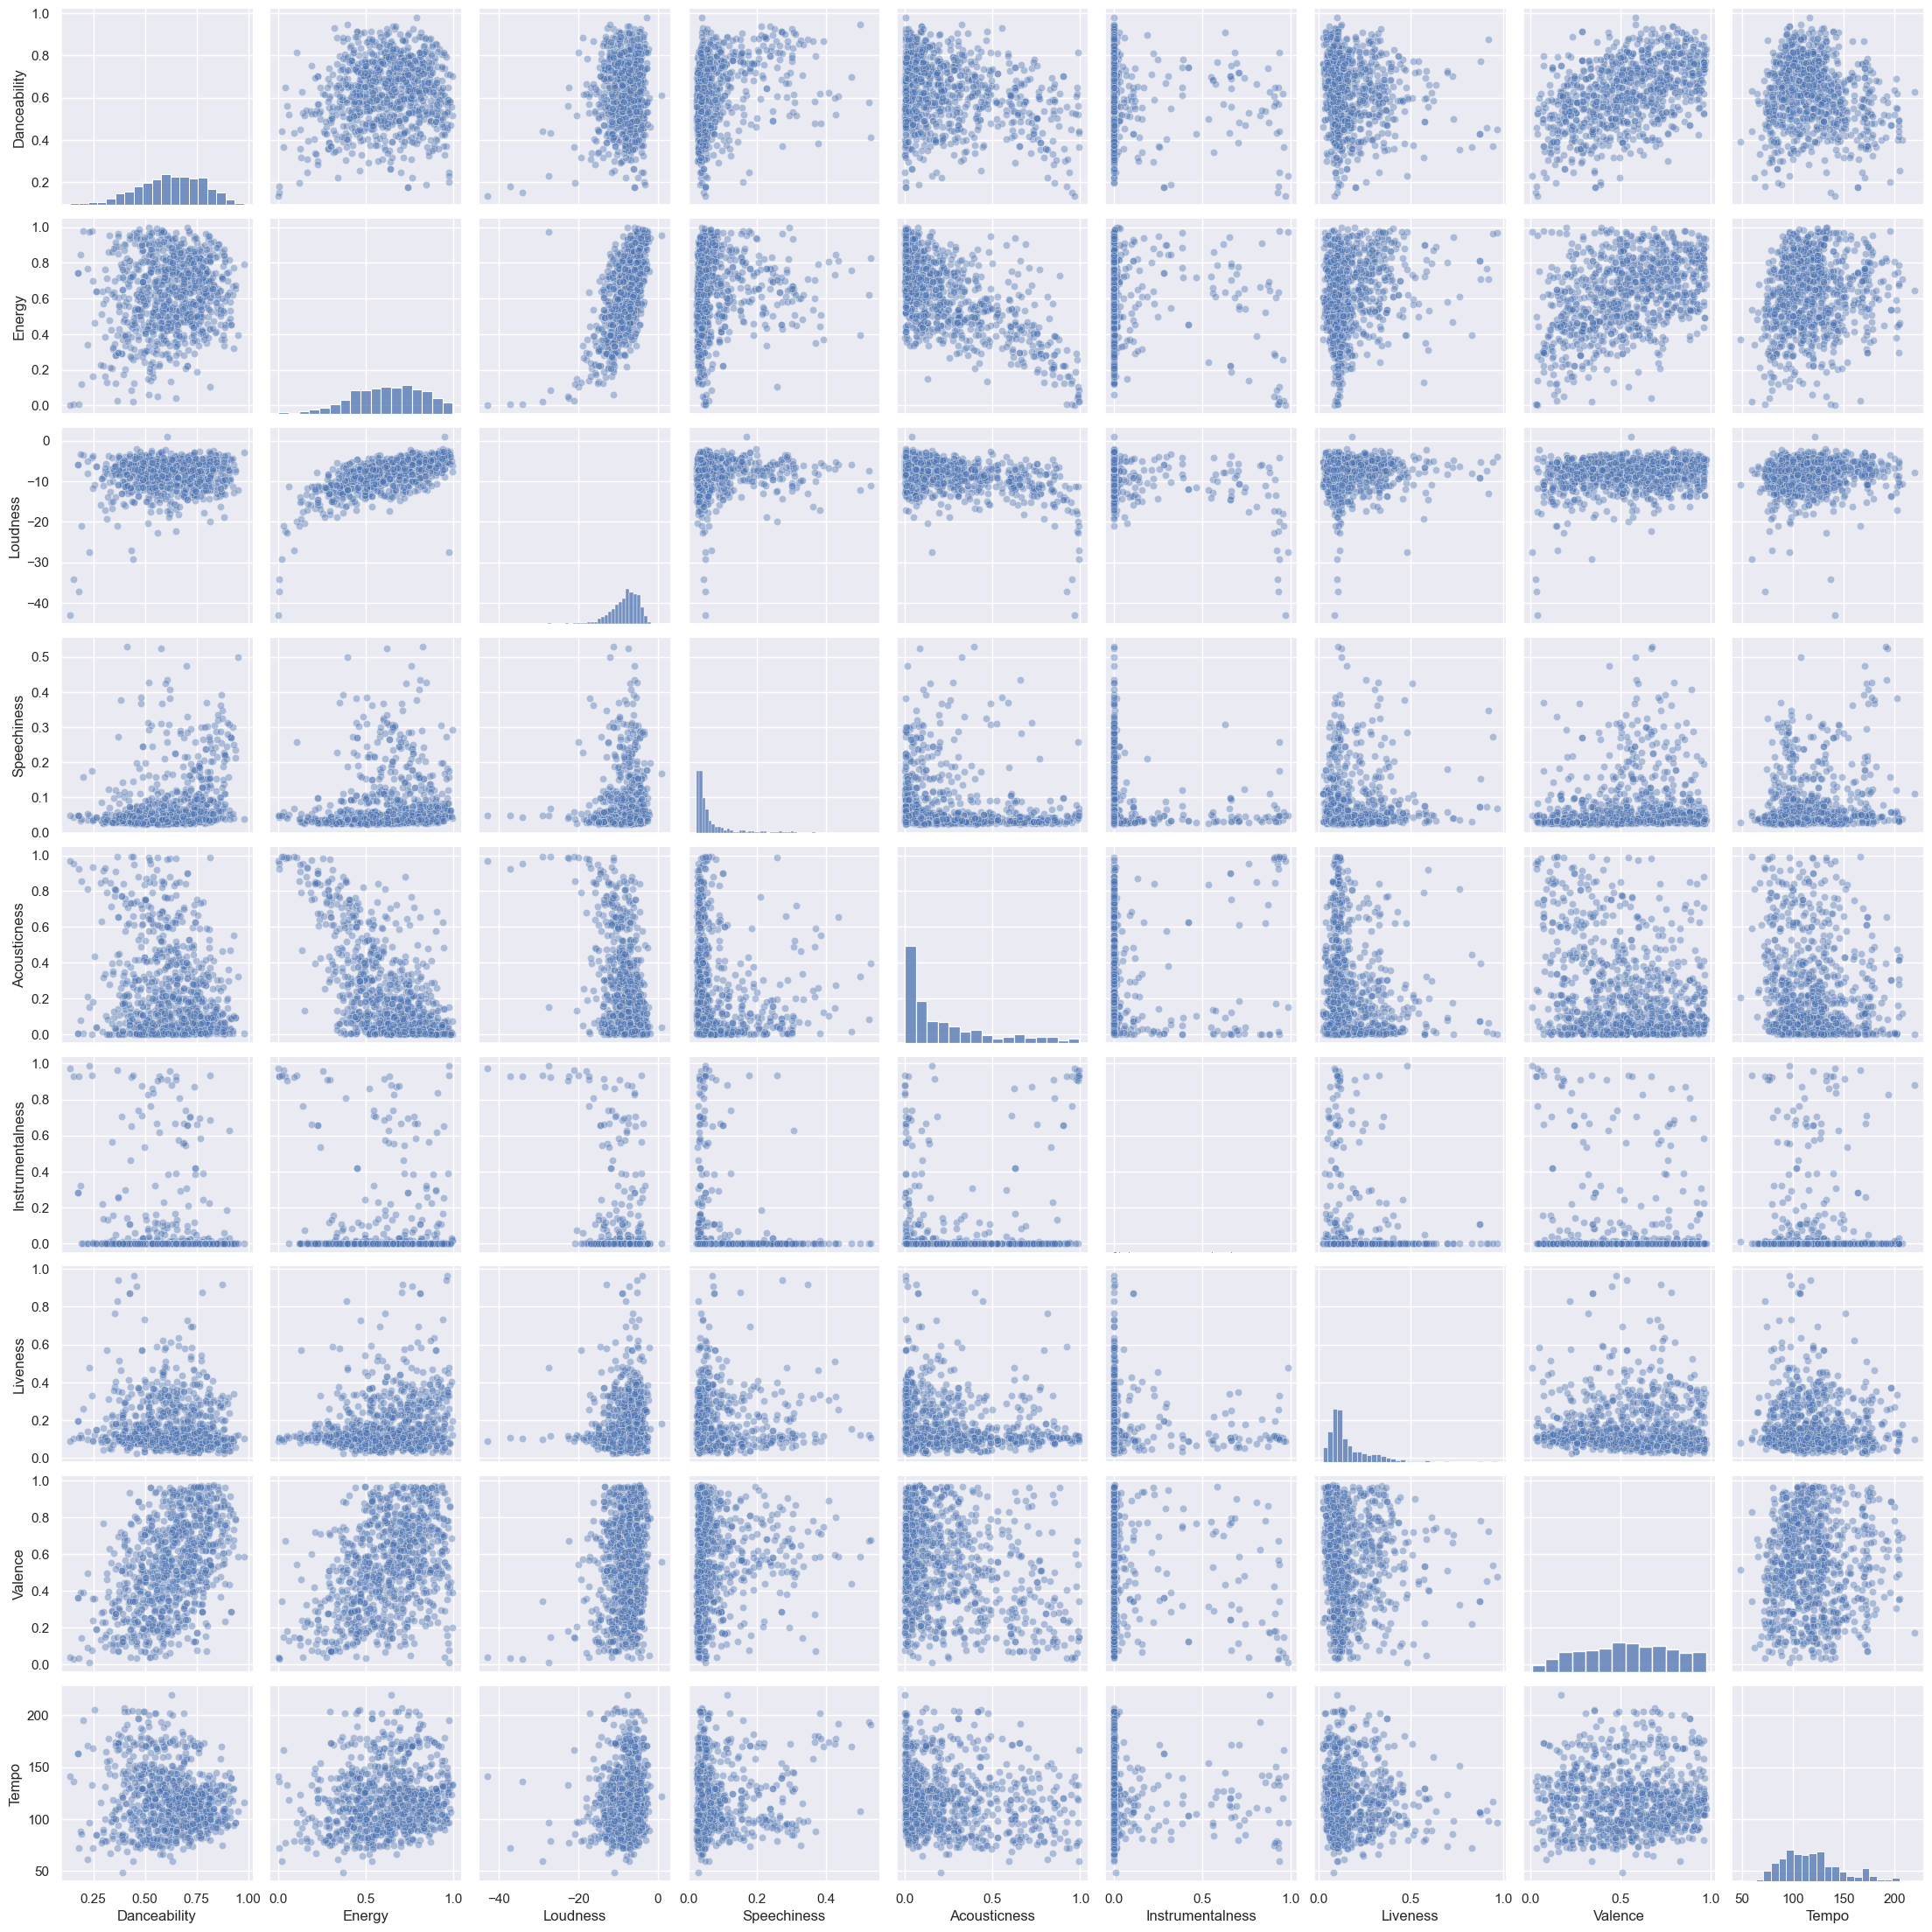

In [8]:
# pairplot
sns.pairplot(
    data=data.select_dtypes(float), 
    plot_kws={"alpha": 0.4}, kind="scatter"
);
# plt.savefig("pairplot.png")

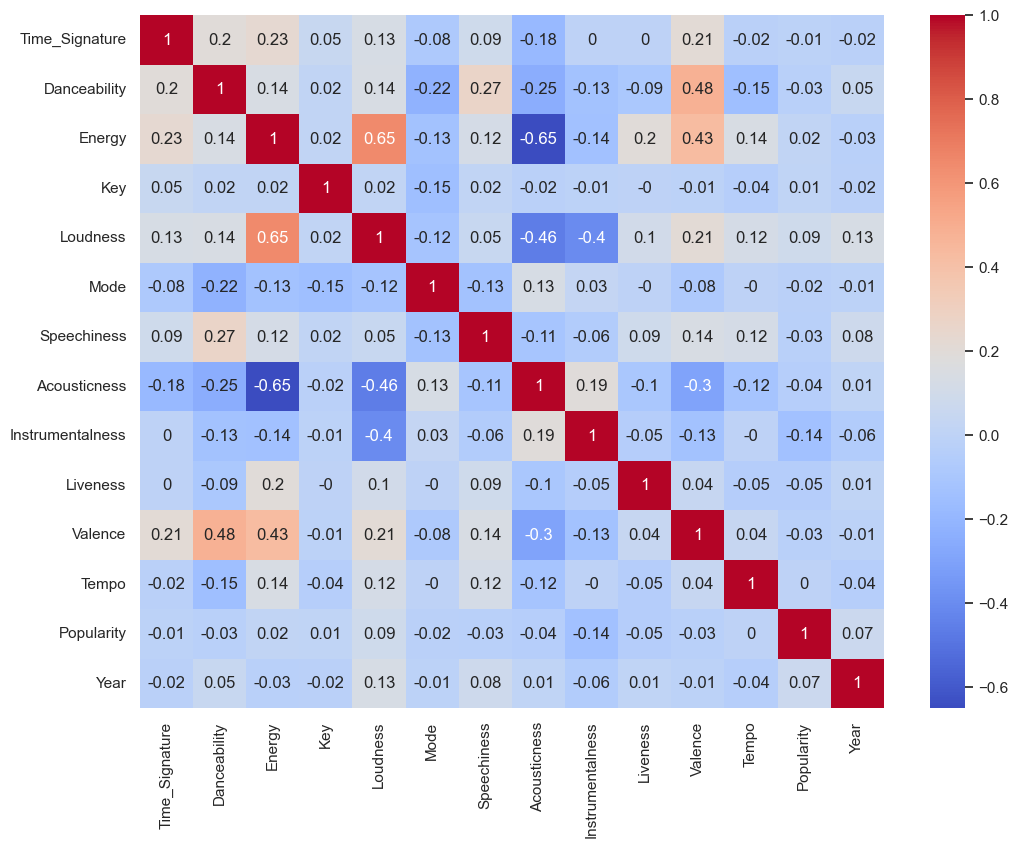

In [9]:
# Looking for correlation among the columns
corr = data.select_dtypes("number").corr().round(2)
sns.heatmap(corr, cmap="coolwarm", annot=True);
# plt.savefig("corrplot.png")

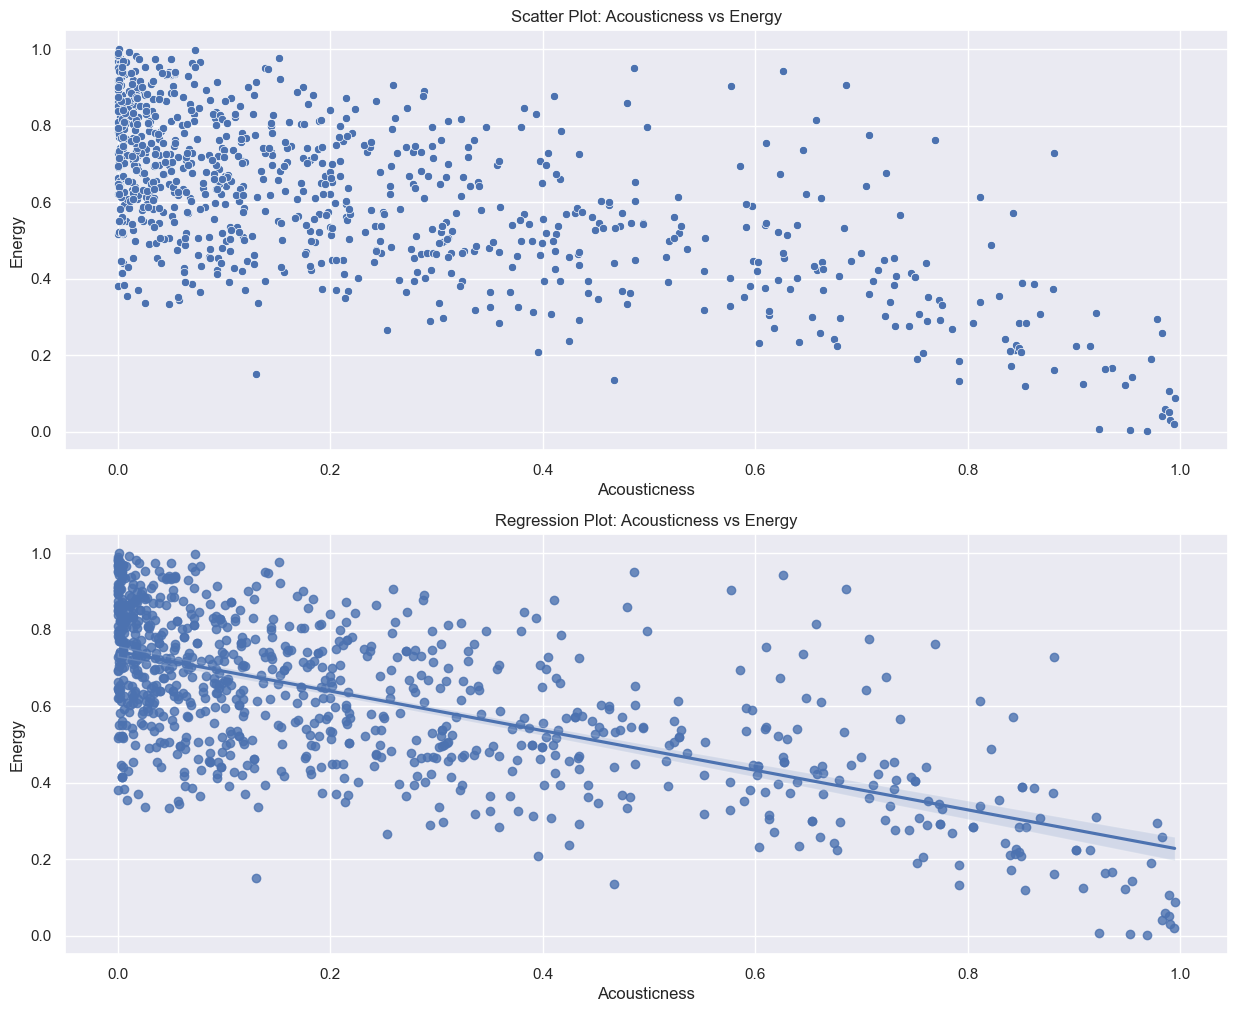

In [19]:
# Acousticness vs Energy, almost a strong correlation
# Scatterplot
fig, ax = plt.subplots(2, 1, figsize=(15, 12)) 
sns.scatterplot(data, x="Acousticness", y="Energy", ax=ax[0])
ax[0].set_title("Scatter Plot: Acousticness vs Energy")

# regression plot
sns.regplot(data, x="Acousticness", y="Energy", ax=ax[1])
ax[1].set_title("Regression Plot: Acousticness vs Energy");
# plt.savefig("reg_acous_energy.png")

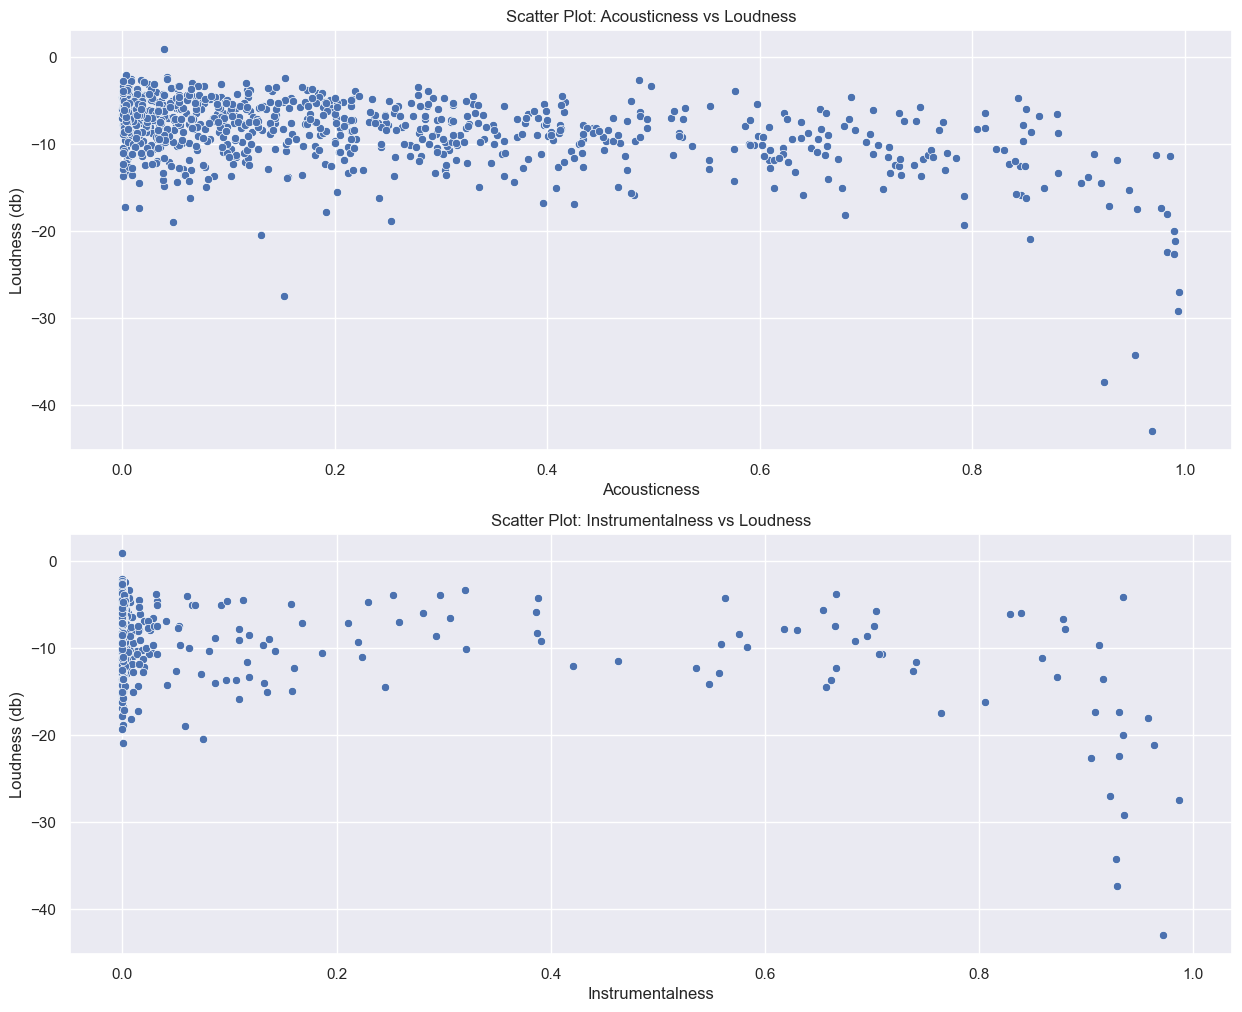

In [23]:
# Acousticness vs Loudness; Instrumentalness vs Loudness; moderate negative correlation
# Scatterplot: Acousticness vs Loudness
fig, ax = plt.subplots(2, 1, figsize=(15, 12)) 
sns.scatterplot(data, x="Acousticness", y="Loudness", ax=ax[0])
ax[0].set_title("Scatter Plot: Acousticness vs Loudness")
ax[0].set_ylabel("Loudness (db)")

# Scatter Plot: Instrumentalness vs Loudness
sns.scatterplot(data, x="Instrumentalness", y="Loudness", ax=ax[1])
ax[1].set_title("Scatter Plot: Instrumentalness vs Loudness")
ax[1].set_ylabel("Loudness (db)");
# plt.savefig("reg_acous_loud.png")


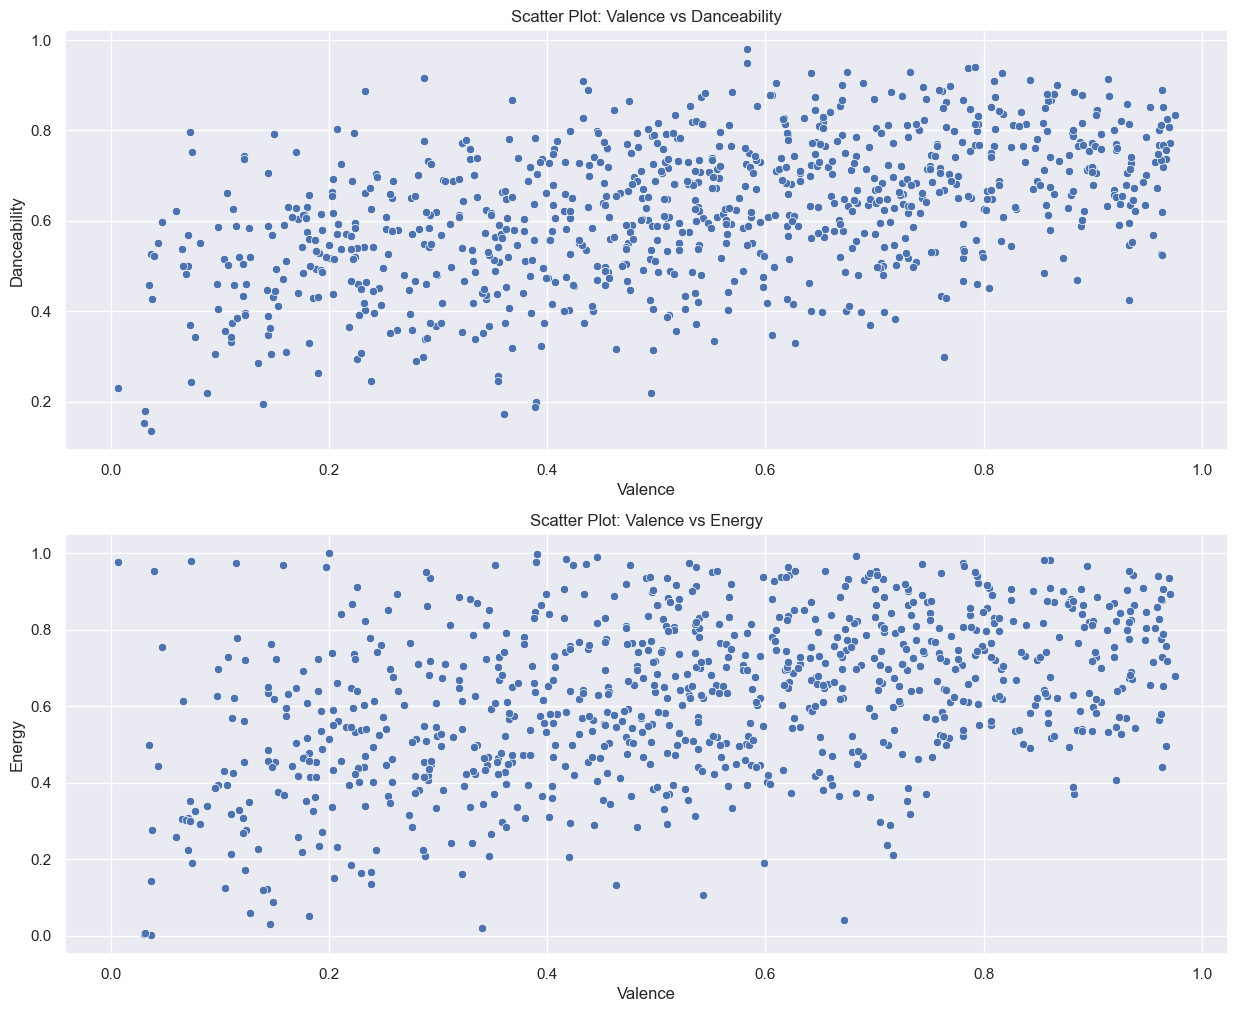

In [12]:
# Valence vs Danceability; Valence vs Energy; moderate positive correlations
# Valence vs Danceability
fig, ax = plt.subplots(2, 1, figsize=(15, 12)) 
sns.scatterplot(data, x="Valence", y="Danceability", ax=ax[0])
ax[0].set_title("Scatter Plot: Valence vs Danceability");


# Valence vs Energy 
sns.scatterplot(data, x="Valence", y="Energy", ax=ax[1])
ax[1].set_title("Scatter Plot: Valence vs Energy");
# plt.savefig("reg_val_danc.png")


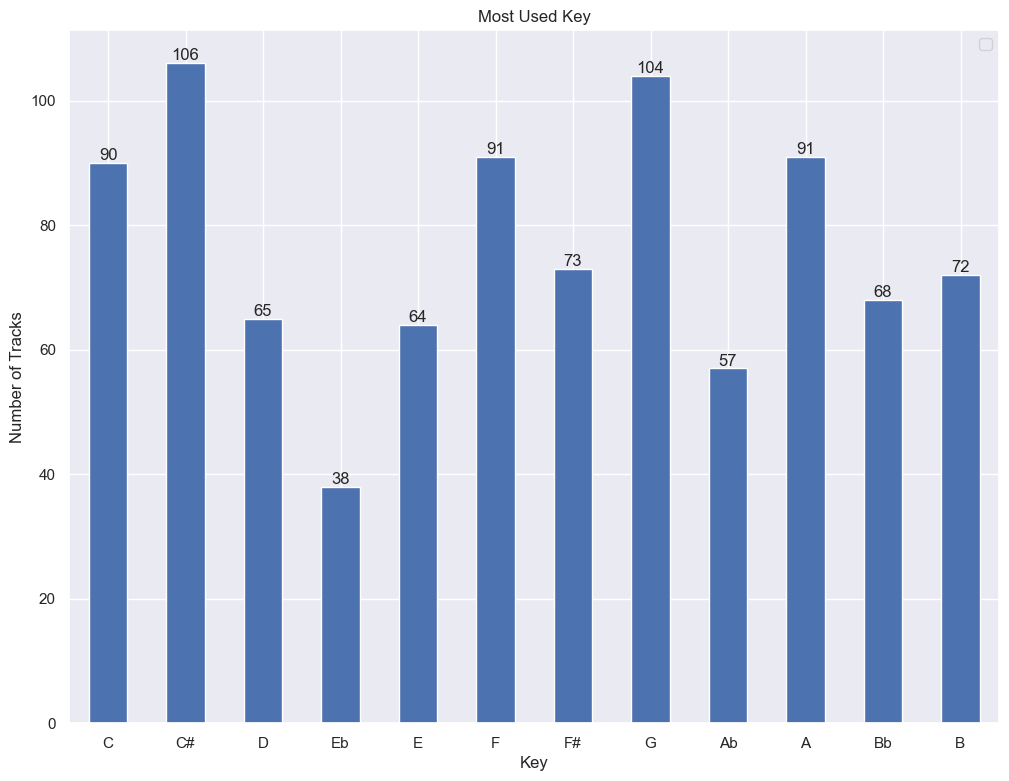

In [ ]:
# most used key
keys = {
    0:"C", 1:"C#", 2:"D", 3:"Eb", 4:"E", 5:"F", 
    6:"F#", 7:"G", 8:"Ab", 9:"A", 10:"Bb", 11:"B"
}
df_keys = (
    pd.DataFrame(
        data.groupby("Key")["Track"].count().reset_index()
        .rename({"Track": "Number of Tracks"}, axis=1)
    )
)    
df_keys["Key"] = df_keys["Key"].map(keys)
df_keys
fig = df_keys.plot(kind="bar", y="Number of Tracks", x="Key")
plt.ylabel("Number of Tracks")
plt.title("Most Used Key")
for i in fig.containers:
    fig.bar_label(i, label_type='edge')
plt.xticks(rotation=0)
plt.legend([]);
# plt.savefig("most_used_key.png")




# alternative approach 1 DATAFRAME
# keys = ["C", "C#", "D", "Eb", "E", "F", "F#", "G", "Ab", "A", "Bb", "B"]
# df_keys = pd.DataFrame(data.groupby("Key")["Track"].count().reset_index().rename({"Track": "Number of Tracks"}, axis=1))
# fig = df_keys.plot(kind="bar", x="Key", y="Number of Tracks")
# for i in fig.containers:
#     fig.bar_label(i, label_type='edge')
# plt.xticks(df_keys["Key"], keys, rotation=0)
# plt.ylabel("Number of Tracks")
# plt.title("Most Used Key")
# plt.legend([]);

# alternative approach 2 SERIES
# keys = ["C", "C#", "D", "Eb", "E", "F", "F#", "G", "Ab", "A", "Bb", "B"]
# df_keys = data.groupby("Key")["Track"].count()
# fig = df_keys.plot(kind="bar")
# for i in fig.containers:
#     fig.bar_label(i, label_type='edge')
# plt.ylabel("Number of Tracks")
# plt.title("Most Used Key")
# plt.xticks(df_keys.index, keys, rotation=0);

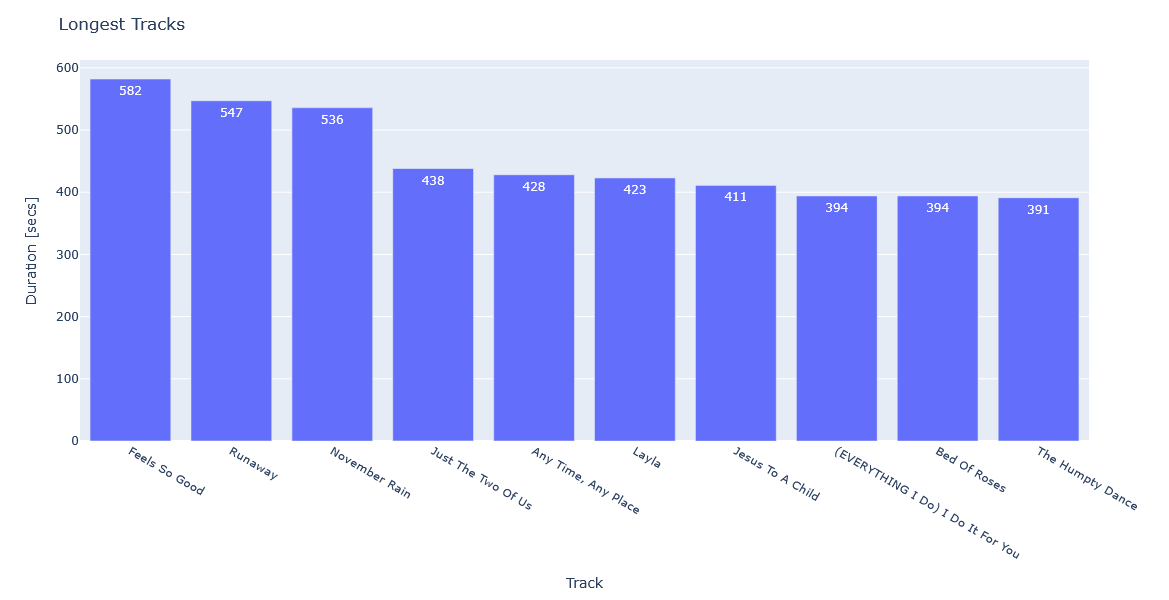

In [14]:
#  longest songs
def split_duration(df):
    df[["mins", "sec"]] = df["Duration"].str.split(":", expand=True).astype(int)
    df["Total Seconds"] = (df["mins"] * 60) + df["sec"]
    df.drop(["mins","sec"], axis="columns", inplace=True)
    return df



data1 = split_duration(data.copy())
df_longest = data1[["Artist", "Track", "Total Seconds"]].sort_values(by="Total Seconds", ascending=False)[0:10]

fig = px.bar(df_longest, y="Total Seconds", x="Track", hover_data="Artist", text="Total Seconds")
fig.update_layout(
    title="Longest Tracks",
    yaxis_title="Duration [secs]",
    height=600
)
fig.show()

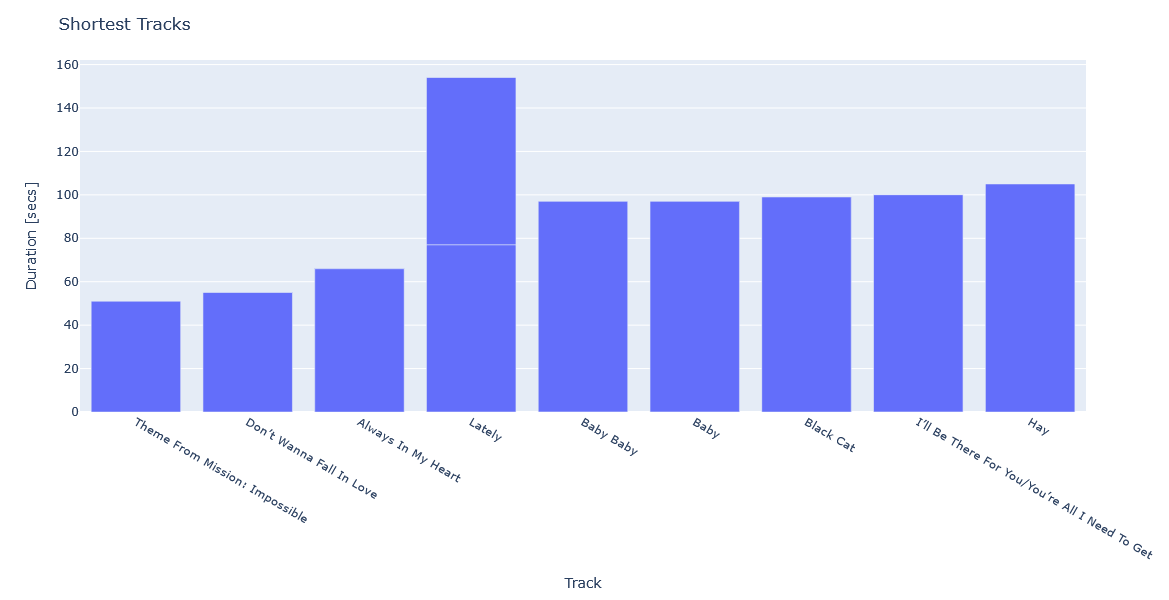

In [15]:
#  Shortest songs
df_shortest = data1[["Artist", "Track", "Total Seconds"]].sort_values(by="Total Seconds")[0:10]


fig = px.bar(df_shortest, y="Total Seconds", x="Track", hover_data="Artist")
fig.update_layout(
    title="Shortest Tracks",
    yaxis_title="Duration [secs]",
    height=600
)
fig.show()

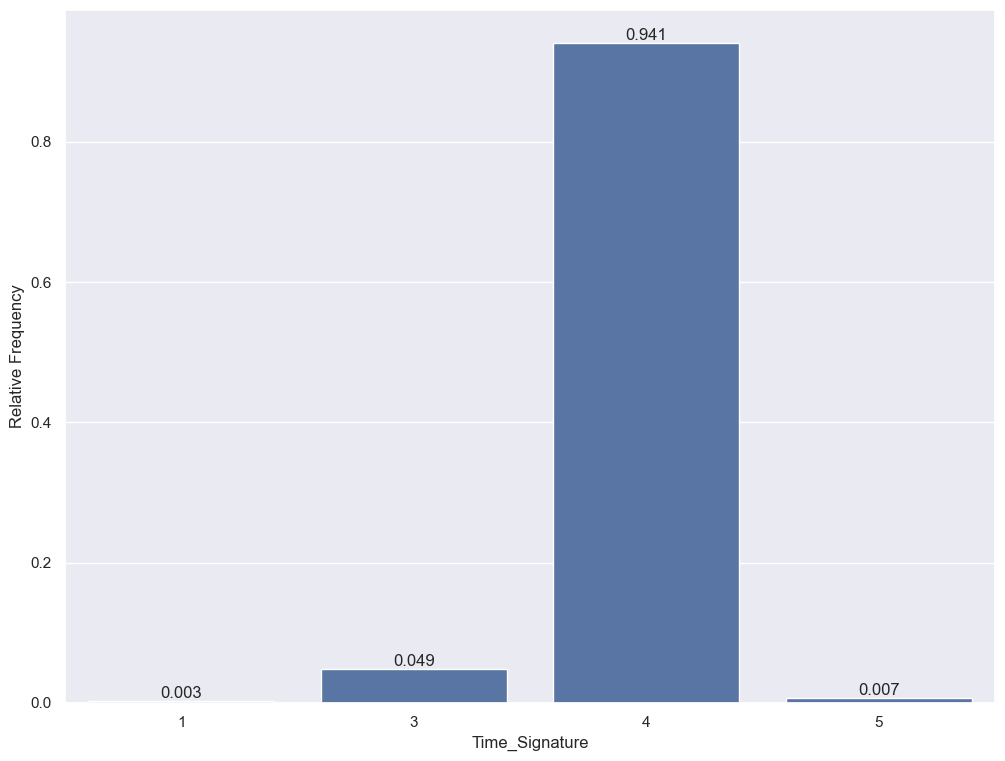

In [16]:
# time signature
df_time_sig =(
    data["Time_Signature"].value_counts(normalize=True)
    .round(3).to_frame().rename({"proportion": "Relative Frequency"}, axis=1)
    .reset_index()
)
df_time_sig
fig = sns.barplot(df_time_sig, x="Time_Signature", y="Relative Frequency")
for i in fig.containers:
    fig.bar_label(i, label_type="edge")
# plt.savefig("time_sig.png")    

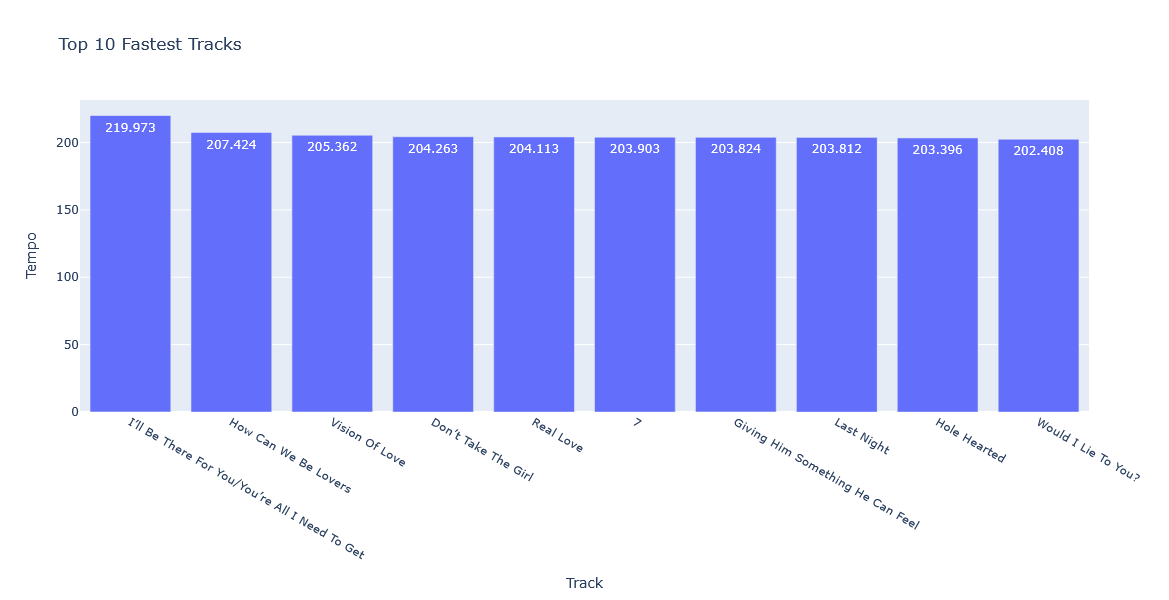

In [ ]:
# fastest tempo
df_fastest = data.sort_values(by="Tempo", ascending=False).head(10)
fig = px.bar(
    df_fastest, x="Track", y="Tempo", 
    hover_data="Artist", text="Tempo", 
    title="Top 10 Fastest Tracks"
)
fig.update_layout(
    height=600
)
fig.show()

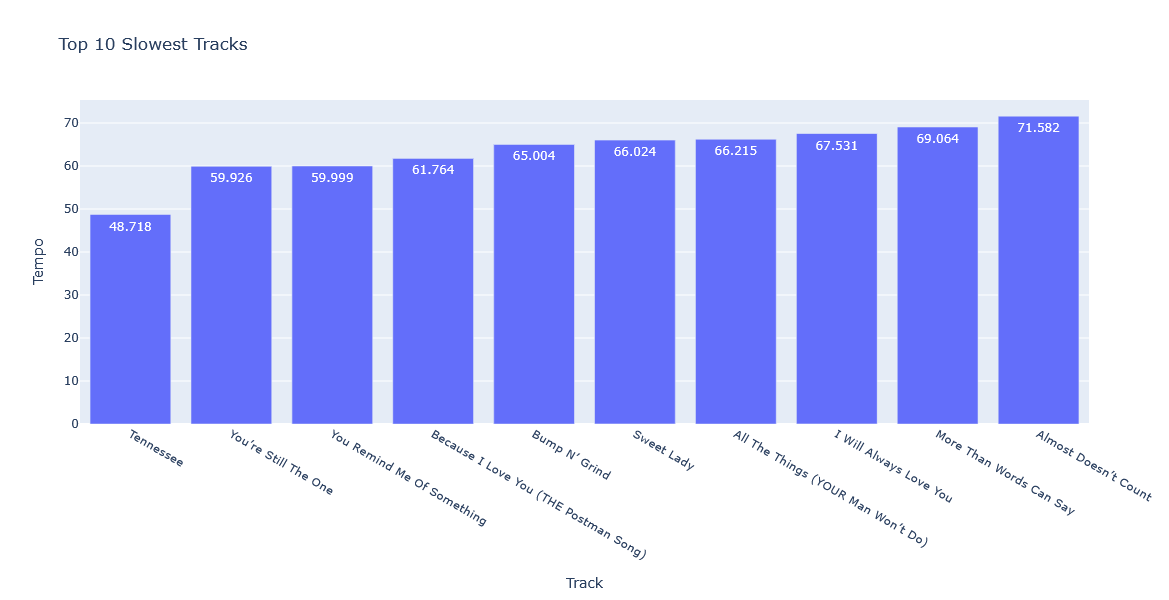

In [ ]:
# slowest tempo
df_slowest = data.sort_values(by="Tempo").head(10)
fig = px.bar(
    df_fastest, x="Track", y="Tempo", 
    hover_data="Artist", text="Tempo", 
    title="Top 10 Slowest Tracks"
)
fig.update_layout(
    height=600
)
fig.show()